In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve,f1_score,confusion_matrix,roc_auc_score,recall_score,precision_score,accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/Users/young/dataset_local/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Class', ylabel='count'>

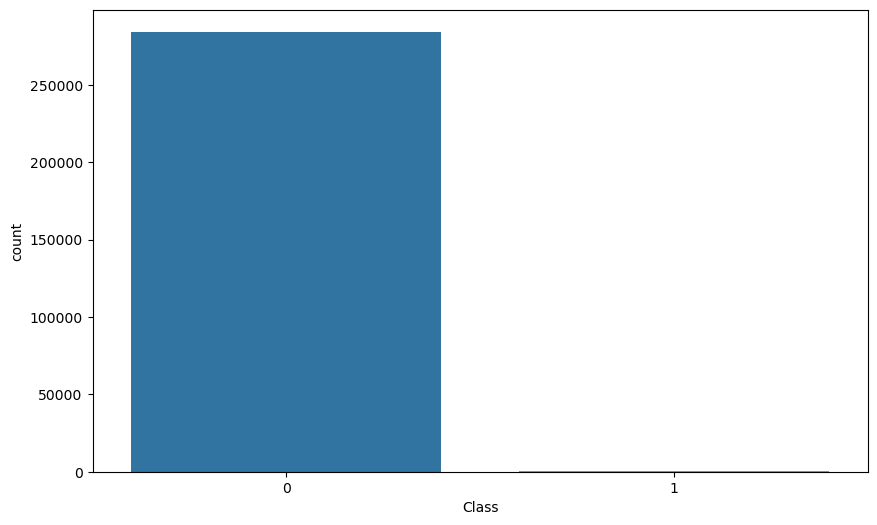

In [7]:
plt.figure(figsize=(10,6))

sns.countplot(data=df,x='Class')

<AxesSubplot:>

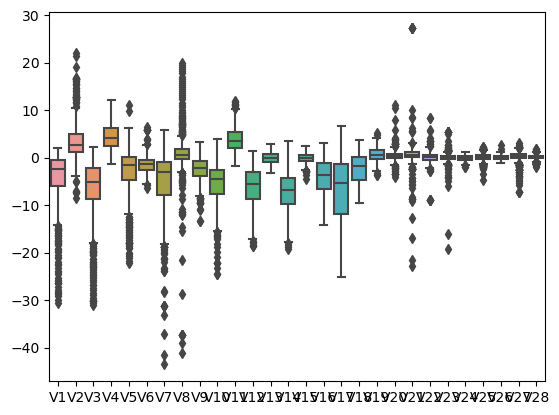

In [8]:
df_f = df[df['Class']==1].iloc[:,1:29]

sns.boxplot(df_f)

In [9]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [12]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,test_size=0.2,stratify=y)
lr = LogisticRegression(solver='saga',max_iter=10000,warm_start=True)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [19]:
print('accuracy_score',accuracy_score(y_test,pred))
print('recall_score',recall_score(y_test,pred))
print('precision_score',precision_score(y_test,pred))
print('roc_auc_score',roc_auc_score(y_test,pred))
print('f1_score',f1_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy_score 0.9979986657771848
recall_score 0.19387755102040816
precision_score 0.35185185185185186
roc_auc_score 0.5966310236812788
f1_score 0.25


array([[56829,    35],
       [   79,    19]])

In [112]:
def model_tester(models,X_test,y_test):
    scores = {
        'model' : [],
        'accuracy_score' : [],
        'recall_score' : [],
        'precision_score' : [],
        'roc_auc_score' : [],
        'f1_score' : [],
        'confusion' : []
    }
    for name,model in models.items():
        pred = model.predict(X_test)
        scores['model'].append(name)
        scores['accuracy_score'].append(accuracy_score(y_test,pred))
        scores['recall_score'].append(recall_score(y_test,pred))
        scores['precision_score'].append(precision_score(y_test,pred))
        scores['roc_auc_score'].append(roc_auc_score(y_test,pred))
        scores['f1_score'].append(f1_score(y_test,pred))
        scores['confusion'].append(confusion_matrix(y_test,pred))
        
    return scores


In [78]:
dfs = df.iloc[:,1:30]
dfs
ss = StandardScaler()
dff = ss.fit_transform(dfs)
dff = pd.DataFrame(dff,columns=dfs.columns)

X = dff
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13,stratify=y)

In [102]:
random_for = RandomForestClassifier(random_state=13,n_jobs=-1)
lgbm = LGBMClassifier(random_state=13,n_jobs=-1)
decisiontree = DecisionTreeClassifier(random_state=13,)
lr = LogisticRegression(random_state=13,n_jobs=-1)


In [79]:
params = {
    'n_estimators' : [100,200,500],
    'max_depth' : [6,8,10],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]

}
grid = GridSearchCV(random_for,param_grid=params,n_jobs=-1,cv=2)
grid.fit(X_train,y_train)

rf_best = grid.best_estimator_
rf_best.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 200, 500]})

In [ ]:
params = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.01,0.1],
    'max_depth' : [6,8,10]
}

grid_lgbm = GridSearchCV(lgbm, param_grid=params,n_jobs=-1,cv=2)
grid_lgbm.fit(X_train,y_train)

lgbm_best = grid_lgbm.best_estimator_
lgbm_best.fit(X_train,y_train)

In [101]:
params = {
    'max_depth' : [6,8,10],
    'min_samples_split' : [8,12],
    'min_samples_leaf' : [8,12],
}

grid_dt = GridSearchCV(decisiontree, param_grid=params,n_jobs=-1,cv=2,verbose=1,)
grid_dt.fit(X_train,y_train)

dt_best = grid_dt.best_estimator_
dt_best.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       random_state=13)

In [103]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter' : [1000,10000],
    'class_weight' : [None,'balanced']
}

grid_lr = GridSearchCV(lr, param_grid=params,n_jobs=-1,cv=2,verbose=1)
grid_lr.fit(X_train,y_train)

lr_best = grid_lr.best_estimator_
lr_best.fit(X_train,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " =

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=13,
                   solver='newton-cg')

In [113]:
models = {
    'Logistic' : lr_best,
    'Decision' : dt_best,
    'LGBM' : lgbm_best,
    'Random Forest' : rf_best
    }
a = model_tester(models,X_test,y_test)
a

{'model': ['Logistic', 'Decision', 'LGBM', 'Random Forest'],
 'accuracy_score': [0.9991573329588147,
  0.9992626663389628,
  0.999385555282469,
  0.9993679997191109],
 'recall_score': [0.5918367346938775,
  0.673469387755102,
  0.6836734693877551,
  0.7244897959183674],
 'precision_score': [0.8787878787878788,
  0.868421052631579,
  0.9436619718309859,
  0.8875],
 'roc_auc_score': [0.7958480240717559,
  0.8366467647835726,
  0.8418015630562862,
  0.8621657617746029],
 'f1_score': [0.7073170731707316,
  0.7586206896551724,
  0.7928994082840236,
  0.797752808988764],
 'confusion': [array([[56856,     8],
         [   40,    58]]),
  array([[56854,    10],
         [   32,    66]]),
  array([[56860,     4],
         [   31,    67]]),
  array([[56855,     9],
         [   27,    71]])]}

In [114]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
95955,-0.988454,-0.103045,1.601839,-1.180797,-0.860078,-0.341904,-0.751139,0.406070,-1.073836,0.084423,...,-0.456468,0.700898,2.156613,0.291472,0.985126,0.842154,-0.332538,-0.682010,-0.252398,-0.305292
124287,0.661561,0.248533,0.066759,0.393835,-0.017876,-0.557897,0.112355,-0.186863,-0.067581,-0.284258,...,-0.004635,-0.425222,-1.172585,0.083219,-0.275972,0.614069,0.258420,-0.043313,0.082778,-0.348072
180124,0.037737,0.461934,0.839230,2.176853,0.730304,0.344836,0.323363,-0.050458,-0.856682,1.063361,...,-0.029684,0.492413,1.694680,-0.265175,-0.958050,-1.203965,0.279883,-0.053171,-0.305274,-0.321764
72817,-0.989276,-0.191134,1.005626,0.044820,0.323652,1.260441,-0.237357,1.098679,-0.215472,-1.064764,...,-0.038611,0.716125,1.474035,0.148540,-1.718172,0.038357,-0.577964,0.032097,-0.259981,0.142533
219279,0.819967,-0.642638,-0.445965,0.241983,-0.040248,1.195401,-0.684677,0.457126,0.969769,0.020402,...,-0.042135,0.452066,1.303683,0.067924,-2.622653,-0.890424,1.010265,0.031974,-0.150980,0.196507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80046,-0.472525,0.530887,0.876481,-0.007007,0.037412,-0.040626,0.335979,0.123356,0.162486,0.134752,...,0.218001,-0.025183,0.449292,-0.242895,0.102237,-0.112188,0.749504,0.839110,0.771996,-0.315288
56182,0.456911,-0.255344,0.661693,0.677147,-0.016499,1.763669,-0.813438,0.738288,0.648706,-0.202846,...,-0.295651,0.132220,0.712249,0.083862,-2.233300,0.167523,-0.577548,0.325073,0.041021,-0.209338
255497,1.015481,-0.389912,-1.287764,-1.014668,-0.123977,-1.155058,0.300928,-0.285121,1.278771,-0.639168,...,-0.266023,0.106036,0.470837,-0.026180,0.084764,0.520868,-0.314586,-0.141705,-0.231630,-0.129097
115359,0.640446,0.145717,0.095270,0.569772,0.029107,-0.085991,-0.038552,0.032857,-0.068654,0.167739,...,-0.181009,-0.087282,-0.281156,-0.201458,-0.873360,1.164898,-0.834898,0.037512,0.016286,-0.350191


### Amount Scale만 standard Scaler 적용

In [127]:
df_2 = df.iloc[:,1:29]
df_amount = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df_2['Amount'] = df_amount

X = df_2
y = df.iloc[:,-1]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X,y,train_size=0.2,random_state=13,stratify=y)



In [129]:
rf_best.fit(X_train_a,y_train_a)
lgbm_best.fit(X_train_a,y_train_a)
dt_best.fit(X_train_a,y_train_a)
lr_best.fit(X_train_a,y_train_a)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=13,
                   solver='newton-cg')

In [130]:
models = {
    'Logistic' : lr_best,
    'Decision' : dt_best,
    'LGBM' : lgbm_best,
    'Random Forest' : rf_best
    }
a = model_tester(models,X_test_a,y_test_a)
a

{'model': ['Logistic', 'Decision', 'LGBM', 'Random Forest'],
 'accuracy_score': [0.9992670487961167,
  0.9993284938072207,
  0.9994294391826058,
  0.9993021602310332],
 'recall_score': [0.6852791878172588,
  0.7233502538071066,
  0.7233502538071066,
  0.7233502538071066],
 'precision_score': [0.8626198083067093,
  0.8662613981762918,
  0.9313725490196079,
  0.8507462686567164],
 'roc_auc_score': [0.8425450684702952,
  0.8615784031992113,
  0.8616289633173901,
  0.8615652136031646],
 'f1_score': [0.7637906647807637,
  0.7883817427385892,
  0.8142857142857143,
  0.7818930041152264],
 'confusion': [array([[227409,     43],
         [   124,    270]]),
  array([[227408,     44],
         [   109,    285]]),
  array([[227431,     21],
         [   109,    285]]),
  array([[227402,     50],
         [   109,    285]])]}

### Log Scale 적용

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Amount', ylabel='Density'>

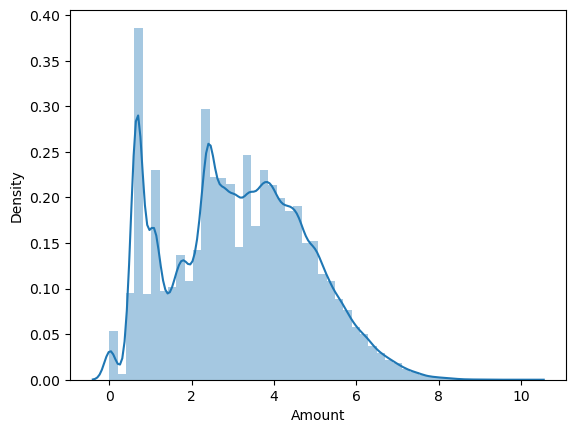

In [131]:
amountLog = np.log1p(df['Amount'])

sns.distplot(amountLog)

In [133]:
df_3 = df.iloc[:,1:29]
df_amount_3 = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df_3['Amount'] = df_amount_3

X = df_3
y = df.iloc[:,-1]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X,y,train_size=0.2,random_state=13,stratify=y)



rf_best.fit(X_train_l,y_train_l)
lgbm_best.fit(X_train_l,y_train_l)
dt_best.fit(X_train_l,y_train_l)
lr_best.fit(X_train_l,y_train_l)

models = {
    'Logistic' : lr_best,
    'Decision' : dt_best,
    'LGBM' : lgbm_best,
    'Random Forest' : rf_best
    }
a = model_tester(models,X_test_l,y_test_l)
a


{'model': ['Logistic', 'Decision', 'LGBM', 'Random Forest'],
 'accuracy_score': [0.9992670487961167,
  0.9993284938072207,
  0.9994294391826058,
  0.9993021602310332],
 'recall_score': [0.6852791878172588,
  0.7233502538071066,
  0.7233502538071066,
  0.7233502538071066],
 'precision_score': [0.8626198083067093,
  0.8662613981762918,
  0.9313725490196079,
  0.8507462686567164],
 'roc_auc_score': [0.8425450684702952,
  0.8615784031992113,
  0.8616289633173901,
  0.8615652136031646],
 'f1_score': [0.7637906647807637,
  0.7883817427385892,
  0.8142857142857143,
  0.7818930041152264],
 'confusion': [array([[227409,     43],
         [   124,    270]]),
  array([[227408,     44],
         [   109,    285]]),
  array([[227431,     21],
         [   109,    285]]),
  array([[227402,     50],
         [   109,    285]])]}

### OverSampling

In [148]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,test_size=0.2,stratify=y)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)


In [151]:
# 원 데이터
rf_best.fit(X_train_over,y_train_over)
lgbm_best.fit(X_train_over,y_train_over)
dt_best.fit(X_train_over,y_train_over)
lr_best.fit(X_train_over,y_train_over)

models = {
    'Logistic' : lr_best,
    'Decision' : dt_best,
    'LGBM' : lgbm_best,
    'Random Forest' : rf_best
    }
a = model_tester(models,X_test,y_test)
a

{'model': ['Logistic', 'Decision', 'LGBM', 'Random Forest'],
 'accuracy_score': [0.9837084372037499,
  0.9788455461535761,
  0.9919595519820231,
  0.9983673326077034],
 'recall_score': [0.8163265306122449,
  0.8469387755102041,
  0.826530612244898,
  0.7959183673469388],
 'precision_score': [0.08080808080808081,
  0.06520031421838178,
  0.15517241379310345,
  0.5165562913907285],
 'roc_auc_score': [0.9001617177540685,
  0.9130058255716468,
  0.909387633077992,
  0.8973173012874255],
 'f1_score': [0.1470588235294118,
  0.12107950401167032,
  0.2612903225806452,
  0.6265060240963854],
 'confusion': [array([[55954,   910],
         [   18,    80]]),
  array([[55674,  1190],
         [   15,    83]]),
  array([[56423,   441],
         [   17,    81]]),
  array([[56791,    73],
         [   20,    78]])]}

In [141]:
models = {
    'Logistic' : lr_best,
    'Decision' : dt_best,
    'LGBM' : lgbm_best,
    'Random Forest' : rf_best
    }
a = model_tester(models,X_test_l,y_test_l)
a

{'model': ['Logistic', 'Decision', 'LGBM', 'Random Forest'],
 'accuracy_score': [0.9871272701737138,
  0.9682899853409759,
  0.9887906744028861,
  0.9985253197335042],
 'recall_score': [0.8883248730964467,
  0.9238578680203046,
  0.9238578680203046,
  0.9187817258883249],
 'precision_score': [0.10805804260574252,
  0.04815451779335891,
  0.1260387811634349,
  0.5435435435435435],
 'roc_auc_score': [0.937811646051767,
  0.9461124100842249,
  0.9563805106065331,
  0.9587225900777995],
 'f1_score': [0.19267822736030832,
  0.09153778448384257,
  0.22181596587446678,
  0.6830188679245283],
 'confusion': [array([[224563,   2889],
         [    44,    350]]),
  array([[220257,   7195],
         [    30,    364]]),
  array([[224928,   2524],
         [    30,    364]]),
  array([[227148,    304],
         [    32,    362]])]}

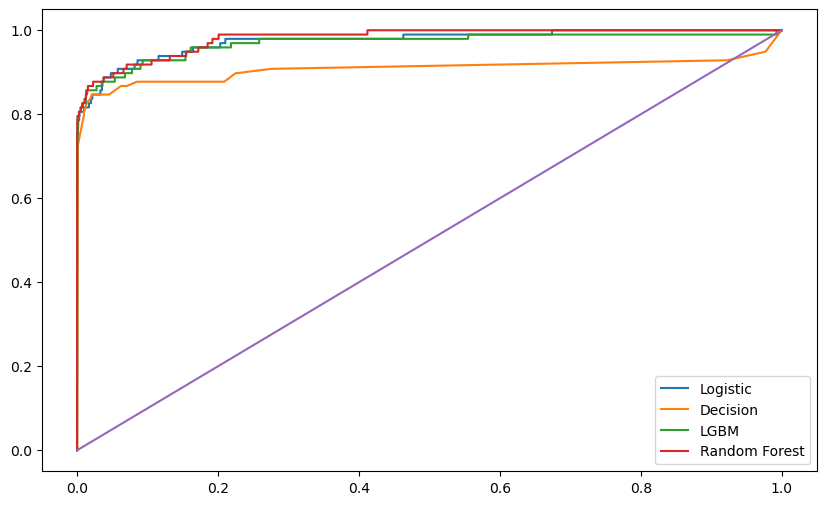

In [158]:
def draw_roc_curve(models,X_test,y_test):
    plt.figure(figsize=(10,6))
    for name,model in models.items():
        pred = model.predict_proba(X_test)[:,1]
        fpr,tpr,thresholds = roc_curve(y_test,pred)
        plt.plot(fpr,tpr,label=name)
    
    plt.plot([0,1],[0,1])
    plt.legend()
draw_roc_curve(models,X_test,y_test)
